# Transfer Learning

## Import Packages

In [1]:
# !pip uninstall ml_project_util -y
# !pip install git+https://github.com/aris-gk3/ml_project_util.git
# or for local development:
# %pip uninstall ml_project_util -y
%pip install git+https://github.com/aris-gk3/ml_project_util.git

import tensorflow as tf # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# My package imports
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head
from ml_project_util.model_evaluation import model_evaluation_precise

  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-v_w9np1i
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-v_w9np1i
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit cb04cae83ee57d134658765811e153245b1cf241
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=22731 sha256=326a7ecd683a39158fc86aa4451fda1587fe356759e292b2d4a49e968aab8c3c
  Stored in directory: /tmp/pip-ephem-wheel-cache-x1cwkefy/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util
Note: you may need to restart the kernel to use updated packages.


2025-06-19 08:36:15.975860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750322176.178510      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750322176.236170      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define Variable Paths

In [2]:
dict = path_definition(ds_rel_path='oxdord-pets-restructured') # path_definition.config
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: oxdord-pets-restructured


## Define the Model

In [3]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
# Adding the new head
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(37, activation='softmax'))

I0000 00:00:1750322191.031949      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Train the Model

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

I0000 00:00:1750322203.566666      93 service.cc:148] XLA service 0x78673800e4b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750322203.567486      93 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750322204.085426      93 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/167 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.0469 - loss: 16.0192 

I0000 00:00:1750322212.524334      93 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 61/167 ━━━━━━━━━━━━━━━━━━━━ 36s 346ms/step - accuracy: 0.0926 - loss: 8.8133

Corrupt JPEG data: premature end of data segment


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.1922 - loss: 5.8137
Epoch 1: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_001_val0.9732.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 83s 427ms/step - accuracy: 0.1930 - loss: 5.7989 - val_accuracy: 0.7284 - val_loss: 0.9732
Epoch 2/30
 66/167 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.5547 - loss: 1.5466

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.5805 - loss: 1.4515
Epoch 2: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_002_val0.6171.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.5809 - loss: 1.4499 - val_accuracy: 0.8224 - val_loss: 0.6171
Epoch 3/30
 62/167 ━━━━━━━━━━━━━━━━━━━━ 38s 370ms/step - accuracy: 0.7115 - loss: 1.0225

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.7080 - loss: 0.9941
Epoch 3: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_003_val0.5579.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.7081 - loss: 0.9935 - val_accuracy: 0.8397 - val_loss: 0.5579
Epoch 4/30
 64/167 ━━━━━━━━━━━━━━━━━━━━ 38s 372ms/step - accuracy: 0.7529 - loss: 0.8170

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.7573 - loss: 0.7962
Epoch 4: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_004_val0.5384.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 66s 391ms/step - accuracy: 0.7574 - loss: 0.7959 - val_accuracy: 0.8435 - val_loss: 0.5384
Epoch 5/30
 61/167 ━━━━━━━━━━━━━━━━━━━━ 39s 372ms/step - accuracy: 0.7676 - loss: 0.7230

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.7775 - loss: 0.6933
Epoch 5: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_005_val0.5045.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 388ms/step - accuracy: 0.7776 - loss: 0.6930 - val_accuracy: 0.8488 - val_loss: 0.5045
Epoch 6/30
 65/167 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - accuracy: 0.8120 - loss: 0.5805

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.8081 - loss: 0.5982
Epoch 6: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_006_val0.4822.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.8082 - loss: 0.5981 - val_accuracy: 0.8570 - val_loss: 0.4822
Epoch 7/30
 61/167 ━━━━━━━━━━━━━━━━━━━━ 39s 371ms/step - accuracy: 0.8129 - loss: 0.5502

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.8212 - loss: 0.5305
Epoch 7: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_007_val0.5013.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 388ms/step - accuracy: 0.8213 - loss: 0.5303 - val_accuracy: 0.8548 - val_loss: 0.5013
Epoch 8/30
 82/167 ━━━━━━━━━━━━━━━━━━━━ 31s 372ms/step - accuracy: 0.8227 - loss: 0.5580

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.8273 - loss: 0.5371
Epoch 8: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_008_val0.5070.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 389ms/step - accuracy: 0.8274 - loss: 0.5367 - val_accuracy: 0.8623 - val_loss: 0.5070
Epoch 9/30
 66/167 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step - accuracy: 0.8648 - loss: 0.4579

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.8601 - loss: 0.4496
Epoch 9: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_009_val0.4775.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.8601 - loss: 0.4494 - val_accuracy: 0.8721 - val_loss: 0.4775
Epoch 10/30
 60/167 ━━━━━━━━━━━━━━━━━━━━ 39s 372ms/step - accuracy: 0.8437 - loss: 0.4445

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.8556 - loss: 0.4179
Epoch 10: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_010_val0.5095.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.8557 - loss: 0.4178 - val_accuracy: 0.8555 - val_loss: 0.5095
Epoch 11/30
 63/167 ━━━━━━━━━━━━━━━━━━━━ 38s 374ms/step - accuracy: 0.8587 - loss: 0.3973

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.8653 - loss: 0.3839
Epoch 11: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_011_val0.5086.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 390ms/step - accuracy: 0.8653 - loss: 0.3840 - val_accuracy: 0.8616 - val_loss: 0.5086
Epoch 12/30
 80/167 ━━━━━━━━━━━━━━━━━━━━ 31s 367ms/step - accuracy: 0.8726 - loss: 0.3691

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.8715 - loss: 0.3695
Epoch 12: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_012_val0.4693.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 385ms/step - accuracy: 0.8715 - loss: 0.3695 - val_accuracy: 0.8706 - val_loss: 0.4693
Epoch 13/30
 85/167 ━━━━━━━━━━━━━━━━━━━━ 30s 370ms/step - accuracy: 0.8726 - loss: 0.3735

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.8756 - loss: 0.3648
Epoch 13: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_013_val0.4838.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 389ms/step - accuracy: 0.8757 - loss: 0.3647 - val_accuracy: 0.8668 - val_loss: 0.4838
Epoch 14/30
 66/167 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.8898 - loss: 0.3364

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.8936 - loss: 0.3313
Epoch 14: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_014_val0.4847.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 388ms/step - accuracy: 0.8936 - loss: 0.3312 - val_accuracy: 0.8661 - val_loss: 0.4847
Epoch 15/30
 65/167 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.9006 - loss: 0.3366

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8984 - loss: 0.3318
Epoch 15: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_015_val0.5227.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.8984 - loss: 0.3318 - val_accuracy: 0.8600 - val_loss: 0.5227
Epoch 16/30
 91/167 ━━━━━━━━━━━━━━━━━━━━ 27s 364ms/step - accuracy: 0.8949 - loss: 0.3239

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.8986 - loss: 0.3140
Epoch 16: saving model to /kaggle/working/SavedModels/OP1/OP1_P1_016_val0.4978.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.8986 - loss: 0.3140 - val_accuracy: 0.8743 - val_loss: 0.4978


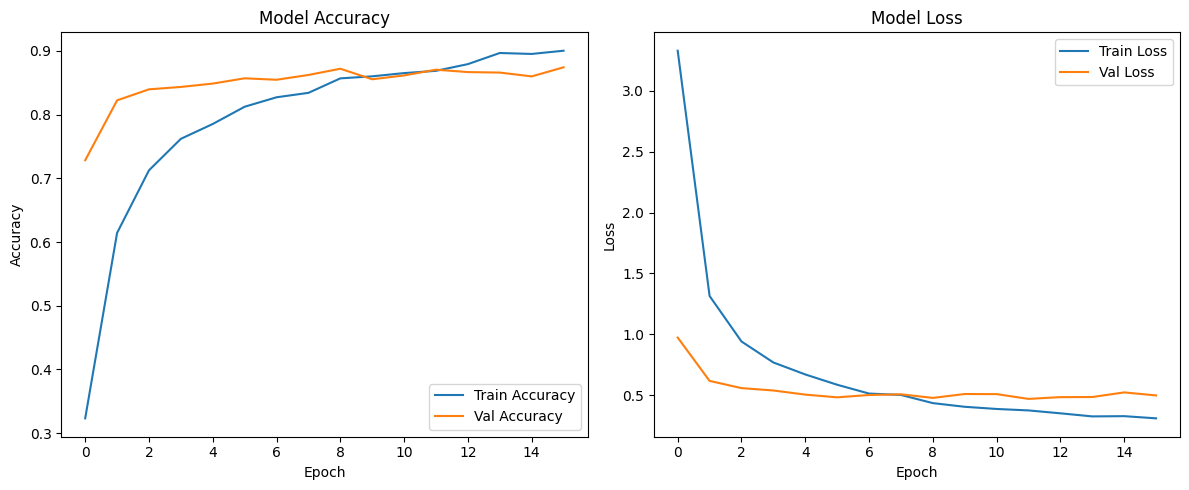

In [4]:
epochs = 30
lr = 1e-3
optimizer = 'Adam'
model_name = 'OP1_P1'

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#     layers.RandomContrast(0.1)
# ], name="data_augmentation")

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.03),  # down from 0.1
    layers.RandomZoom(0.03),      # down from 0.1
    layers.RandomContrast(0.05)   # down from 0.1
])

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [5]:
model_evaluation_precise(model)

Found 736 files belonging to 37 classes.
Start evaluating batches
Batch Number: 0

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Batch Number: 22
Precise test accuracy: 0.88723
Precise test loss: 0.35293


(0.88722825, 0.35293258321673976)

In [6]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(37, activation='softmax'))

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_1 (GlobalAveragePooling2D), Trainable: False
- dense_2 (Dense), Trainable: False
- dropout_1 (Dropout), Trainable: False
- dense_3 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

Corrupt JPEG data: premature end of data segment


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.0426 - loss: 12.9368
Epoch 1: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_001_val3.4543.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 69s 394ms/step - accuracy: 0.0427 - loss: 12.9180 - val_accuracy: 0.2393 - val_loss: 3.4543
Epoch 2/35
 66/167 ━━━━━━━━━━━━━━━━━━━━ 37s 367ms/step - accuracy: 0.1528 - loss: 5.1102

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.1554 - loss: 4.7119
Epoch 2: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_002_val2.1924.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.1556 - loss: 4.7056 - val_accuracy: 0.3920 - val_loss: 2.1924
Epoch 3/35
 62/167 ━━━━━━━━━━━━━━━━━━━━ 39s 373ms/step - accuracy: 0.2394 - loss: 3.1806

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.2500 - loss: 3.0406
Epoch 3: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_003_val1.7755.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 388ms/step - accuracy: 0.2502 - loss: 3.0388 - val_accuracy: 0.4913 - val_loss: 1.7755
Epoch 4/35
 64/167 ━━━━━━━━━━━━━━━━━━━━ 37s 367ms/step - accuracy: 0.3044 - loss: 2.6522

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.3239 - loss: 2.5455
Epoch 4: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_004_val1.4861.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 384ms/step - accuracy: 0.3242 - loss: 2.5443 - val_accuracy: 0.5801 - val_loss: 1.4861
Epoch 5/35
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 367ms/step - accuracy: 0.3974 - loss: 2.2355

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.4011 - loss: 2.1918
Epoch 5: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_005_val1.2803.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.4012 - loss: 2.1911 - val_accuracy: 0.6275 - val_loss: 1.2803
Epoch 6/35
 65/167 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - accuracy: 0.4778 - loss: 1.8890

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.4670 - loss: 1.9014
Epoch 6: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_006_val1.1071.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.4669 - loss: 1.9013 - val_accuracy: 0.6757 - val_loss: 1.1071
Epoch 7/35
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 365ms/step - accuracy: 0.4886 - loss: 1.7831

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.5011 - loss: 1.7482
Epoch 7: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_007_val0.9785.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.5013 - loss: 1.7476 - val_accuracy: 0.7096 - val_loss: 0.9785
Epoch 8/35
 82/167 ━━━━━━━━━━━━━━━━━━━━ 31s 368ms/step - accuracy: 0.5804 - loss: 1.5060

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.5722 - loss: 1.5137
Epoch 8: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_008_val0.8893.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.5722 - loss: 1.5136 - val_accuracy: 0.7359 - val_loss: 0.8893
Epoch 9/35
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.5784 - loss: 1.4353

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.5814 - loss: 1.4147
Epoch 9: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_009_val0.8201.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.5815 - loss: 1.4143 - val_accuracy: 0.7464 - val_loss: 0.8201
Epoch 10/35
 60/167 ━━━━━━━━━━━━━━━━━━━━ 39s 365ms/step - accuracy: 0.6026 - loss: 1.3825

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.6123 - loss: 1.3250
Epoch 10: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_010_val0.7730.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 384ms/step - accuracy: 0.6125 - loss: 1.3244 - val_accuracy: 0.7630 - val_loss: 0.7730
Epoch 11/35
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 365ms/step - accuracy: 0.6437 - loss: 1.2284

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.6497 - loss: 1.1840
Epoch 11: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_011_val0.7171.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.6497 - loss: 1.1836 - val_accuracy: 0.7788 - val_loss: 0.7171
Epoch 12/35
 80/167 ━━━━━━━━━━━━━━━━━━━━ 31s 367ms/step - accuracy: 0.6505 - loss: 1.1079

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.6598 - loss: 1.0917
Epoch 12: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_012_val0.6741.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.6599 - loss: 1.0916 - val_accuracy: 0.7946 - val_loss: 0.6741
Epoch 13/35
 85/167 ━━━━━━━━━━━━━━━━━━━━ 30s 370ms/step - accuracy: 0.6777 - loss: 1.0834

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.6841 - loss: 1.0548
Epoch 13: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_013_val0.6469.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.6842 - loss: 1.0544 - val_accuracy: 0.8066 - val_loss: 0.6469
Epoch 14/35
 66/167 ━━━━━━━━━━━━━━━━━━━━ 37s 367ms/step - accuracy: 0.6970 - loss: 0.9817

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.7029 - loss: 0.9715
Epoch 14: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_014_val0.6257.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.7030 - loss: 0.9714 - val_accuracy: 0.8104 - val_loss: 0.6257
Epoch 15/35
 65/167 ━━━━━━━━━━━━━━━━━━━━ 37s 365ms/step - accuracy: 0.7132 - loss: 0.9405

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.7173 - loss: 0.9230
Epoch 15: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_015_val0.5985.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.7174 - loss: 0.9227 - val_accuracy: 0.8141 - val_loss: 0.5985
Epoch 16/35
 91/167 ━━━━━━━━━━━━━━━━━━━━ 27s 364ms/step - accuracy: 0.7417 - loss: 0.8531

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.7410 - loss: 0.8524
Epoch 16: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_016_val0.5804.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 384ms/step - accuracy: 0.7410 - loss: 0.8524 - val_accuracy: 0.8209 - val_loss: 0.5804
Epoch 17/35
 60/167 ━━━━━━━━━━━━━━━━━━━━ 39s 365ms/step - accuracy: 0.7491 - loss: 0.8671

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.7536 - loss: 0.8272
Epoch 17: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_017_val0.5700.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.7536 - loss: 0.8269 - val_accuracy: 0.8224 - val_loss: 0.5700
Epoch 18/35
 60/167 ━━━━━━━━━━━━━━━━━━━━ 39s 365ms/step - accuracy: 0.7613 - loss: 0.7714

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.7599 - loss: 0.7738
Epoch 18: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_018_val0.5476.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.7599 - loss: 0.7738 - val_accuracy: 0.8284 - val_loss: 0.5476
Epoch 19/35
 66/167 ━━━━━━━━━━━━━━━━━━━━ 37s 374ms/step - accuracy: 0.7844 - loss: 0.6999

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.7801 - loss: 0.7124
Epoch 19: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_019_val0.5337.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 388ms/step - accuracy: 0.7801 - loss: 0.7125 - val_accuracy: 0.8345 - val_loss: 0.5337
Epoch 20/35
 63/167 ━━━━━━━━━━━━━━━━━━━━ 38s 372ms/step - accuracy: 0.7645 - loss: 0.7546

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.7746 - loss: 0.7227
Epoch 20: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_020_val0.5280.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 389ms/step - accuracy: 0.7747 - loss: 0.7224 - val_accuracy: 0.8412 - val_loss: 0.5280
Epoch 21/35
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 364ms/step - accuracy: 0.8028 - loss: 0.6594

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.8003 - loss: 0.6509
Epoch 21: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_021_val0.5153.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.8002 - loss: 0.6509 - val_accuracy: 0.8375 - val_loss: 0.5153
Epoch 22/35
 78/167 ━━━━━━━━━━━━━━━━━━━━ 32s 363ms/step - accuracy: 0.8126 - loss: 0.6130

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.8103 - loss: 0.6201
Epoch 22: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_022_val0.5204.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.8102 - loss: 0.6201 - val_accuracy: 0.8382 - val_loss: 0.5204
Epoch 23/35
 70/167 ━━━━━━━━━━━━━━━━━━━━ 34s 360ms/step - accuracy: 0.7944 - loss: 0.6146

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.7992 - loss: 0.6099
Epoch 23: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_023_val0.5080.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 379ms/step - accuracy: 0.7992 - loss: 0.6098 - val_accuracy: 0.8503 - val_loss: 0.5080
Epoch 24/35
 64/167 ━━━━━━━━━━━━━━━━━━━━ 38s 370ms/step - accuracy: 0.8017 - loss: 0.6681

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.8093 - loss: 0.6158
Epoch 24: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_024_val0.5123.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 388ms/step - accuracy: 0.8093 - loss: 0.6153 - val_accuracy: 0.8457 - val_loss: 0.5123
Epoch 25/35
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 365ms/step - accuracy: 0.8253 - loss: 0.5637

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.8240 - loss: 0.5573
Epoch 25: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_025_val0.4983.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.8240 - loss: 0.5572 - val_accuracy: 0.8533 - val_loss: 0.4983
Epoch 26/35
 71/167 ━━━━━━━━━━━━━━━━━━━━ 35s 365ms/step - accuracy: 0.8038 - loss: 0.5761

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.8166 - loss: 0.5501
Epoch 26: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_026_val0.4982.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.8167 - loss: 0.5499 - val_accuracy: 0.8548 - val_loss: 0.4982
Epoch 27/35
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 359ms/step - accuracy: 0.8413 - loss: 0.4938

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8378 - loss: 0.5013
Epoch 27: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_027_val0.4903.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 378ms/step - accuracy: 0.8378 - loss: 0.5013 - val_accuracy: 0.8555 - val_loss: 0.4903
Epoch 28/35
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 366ms/step - accuracy: 0.8363 - loss: 0.5230

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8363 - loss: 0.5114
Epoch 28: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_028_val0.4770.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.8363 - loss: 0.5112 - val_accuracy: 0.8593 - val_loss: 0.4770
Epoch 29/35
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 363ms/step - accuracy: 0.8395 - loss: 0.5323

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.8415 - loss: 0.5042
Epoch 29: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_029_val0.4799.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.8415 - loss: 0.5039 - val_accuracy: 0.8593 - val_loss: 0.4799
Epoch 30/35
 64/167 ━━━━━━━━━━━━━━━━━━━━ 37s 364ms/step - accuracy: 0.8402 - loss: 0.4912

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.8495 - loss: 0.4649
Epoch 30: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_030_val0.4787.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.8495 - loss: 0.4648 - val_accuracy: 0.8570 - val_loss: 0.4787
Epoch 31/35
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 363ms/step - accuracy: 0.8543 - loss: 0.4590

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.8543 - loss: 0.4512
Epoch 31: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_031_val0.4781.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.8543 - loss: 0.4510 - val_accuracy: 0.8570 - val_loss: 0.4781
Epoch 32/35
 74/167 ━━━━━━━━━━━━━━━━━━━━ 34s 369ms/step - accuracy: 0.8823 - loss: 0.3941

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8742 - loss: 0.4046
Epoch 32: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_032_val0.4706.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.8741 - loss: 0.4047 - val_accuracy: 0.8570 - val_loss: 0.4706
Epoch 33/35
 64/167 ━━━━━━━━━━━━━━━━━━━━ 37s 361ms/step - accuracy: 0.8635 - loss: 0.4214

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.8635 - loss: 0.4176
Epoch 33: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_033_val0.4641.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.8635 - loss: 0.4175 - val_accuracy: 0.8623 - val_loss: 0.4641
Epoch 34/35
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 365ms/step - accuracy: 0.8761 - loss: 0.3839

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.8745 - loss: 0.3849
Epoch 34: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_034_val0.4672.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.8745 - loss: 0.3850 - val_accuracy: 0.8616 - val_loss: 0.4672
Epoch 35/35
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 360ms/step - accuracy: 0.8854 - loss: 0.3617

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.8797 - loss: 0.3669
Epoch 35: saving model to /kaggle/working/SavedModels/OP1/OP1_P2_035_val0.4714.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.8796 - loss: 0.3670 - val_accuracy: 0.8616 - val_loss: 0.4714


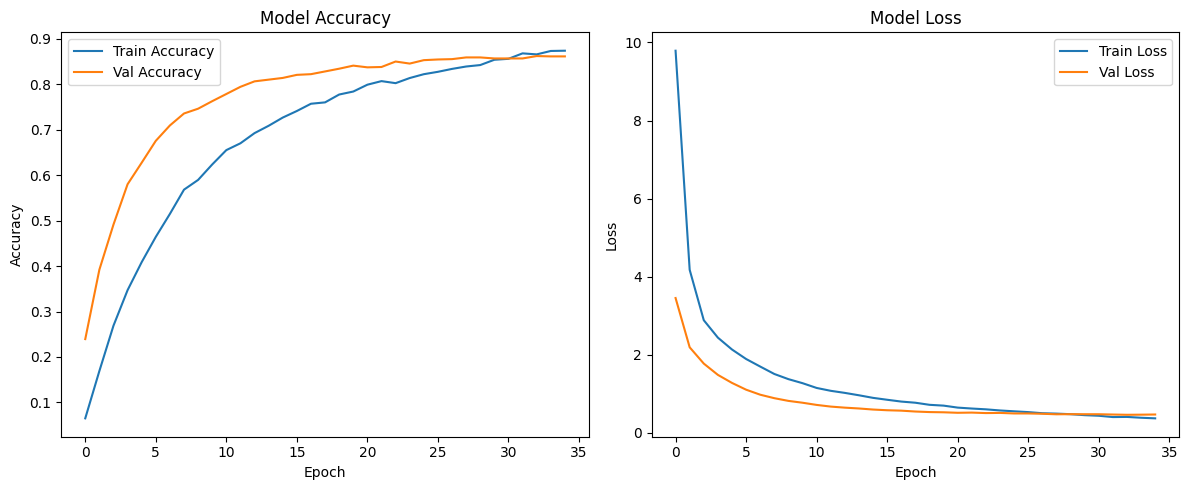

In [7]:
epochs = 35
lr = 1e-4
optimizer = 'Adam'
name = 'OP1_P2'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [8]:
model_evaluation_precise(model)

Found 736 files belonging to 37 classes.
Start evaluating batches
Batch Number: 4

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Batch Number: 22
Precise test accuracy: 0.87500
Precise test loss: 0.39091


(0.875, 0.39091176442478015)

In [9]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(37, activation='softmax'))

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_2 (GlobalAveragePooling2D), Trainable: False
- dense_4 (Dense), Trainable: False
- dropout_2 (Dropout), Trainable: False
- dense_5 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

Corrupt JPEG data: premature end of data segment


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.0509 - loss: 11.8910
Epoch 1: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_001_val3.5029.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 68s 389ms/step - accuracy: 0.0510 - loss: 11.8731 - val_accuracy: 0.2227 - val_loss: 3.5029
Epoch 2/40
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 364ms/step - accuracy: 0.1427 - loss: 4.5204

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.1613 - loss: 4.2463
Epoch 2: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_002_val2.2566.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 385ms/step - accuracy: 0.1616 - loss: 4.2415 - val_accuracy: 0.3717 - val_loss: 2.2566
Epoch 3/40
 62/167 ━━━━━━━━━━━━━━━━━━━━ 38s 362ms/step - accuracy: 0.2460 - loss: 3.1242

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.2593 - loss: 3.0009
Epoch 3: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_003_val1.7976.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 382ms/step - accuracy: 0.2595 - loss: 2.9990 - val_accuracy: 0.4898 - val_loss: 1.7976
Epoch 4/40
 64/167 ━━━━━━━━━━━━━━━━━━━━ 37s 363ms/step - accuracy: 0.3151 - loss: 2.4880

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.3336 - loss: 2.4457
Epoch 4: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_004_val1.4991.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.3340 - loss: 2.4447 - val_accuracy: 0.5801 - val_loss: 1.4991
Epoch 5/40
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 366ms/step - accuracy: 0.3809 - loss: 2.2525

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.4028 - loss: 2.1714
Epoch 5: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_005_val1.2820.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 65s 386ms/step - accuracy: 0.4032 - loss: 2.1703 - val_accuracy: 0.6403 - val_loss: 1.2820
Epoch 6/40
 65/167 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.4816 - loss: 1.8656

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.4764 - loss: 1.8734
Epoch 6: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_006_val1.1101.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.4765 - loss: 1.8732 - val_accuracy: 0.6795 - val_loss: 1.1101
Epoch 7/40
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 359ms/step - accuracy: 0.4989 - loss: 1.7981

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.5117 - loss: 1.7415
Epoch 7: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_007_val0.9947.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.5118 - loss: 1.7407 - val_accuracy: 0.7103 - val_loss: 0.9947
Epoch 8/40
 82/167 ━━━━━━━━━━━━━━━━━━━━ 30s 363ms/step - accuracy: 0.5775 - loss: 1.4510

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.5723 - loss: 1.4672
Epoch 8: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_008_val0.8930.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.5723 - loss: 1.4672 - val_accuracy: 0.7359 - val_loss: 0.8930
Epoch 9/40
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.6304 - loss: 1.2812

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.6182 - loss: 1.3121
Epoch 9: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_009_val0.8264.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.6181 - loss: 1.3123 - val_accuracy: 0.7494 - val_loss: 0.8264
Epoch 10/40
 60/167 ━━━━━━━━━━━━━━━━━━━━ 38s 358ms/step - accuracy: 0.6410 - loss: 1.2593

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.6398 - loss: 1.2458
Epoch 10: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_010_val0.7751.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 377ms/step - accuracy: 0.6398 - loss: 1.2456 - val_accuracy: 0.7630 - val_loss: 0.7751
Epoch 11/40
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 360ms/step - accuracy: 0.6593 - loss: 1.2123

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.6570 - loss: 1.1843
Epoch 11: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_011_val0.7256.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.6570 - loss: 1.1841 - val_accuracy: 0.7735 - val_loss: 0.7256
Epoch 12/40
 80/167 ━━━━━━━━━━━━━━━━━━━━ 31s 361ms/step - accuracy: 0.6750 - loss: 1.0905

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.6811 - loss: 1.0757
Epoch 12: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_012_val0.6882.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 379ms/step - accuracy: 0.6811 - loss: 1.0754 - val_accuracy: 0.7863 - val_loss: 0.6882
Epoch 13/40
 85/167 ━━━━━━━━━━━━━━━━━━━━ 29s 360ms/step - accuracy: 0.6898 - loss: 1.0490

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.6933 - loss: 1.0333
Epoch 13: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_013_val0.6589.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 377ms/step - accuracy: 0.6933 - loss: 1.0331 - val_accuracy: 0.7961 - val_loss: 0.6589
Epoch 14/40
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 361ms/step - accuracy: 0.7190 - loss: 0.8975

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.7166 - loss: 0.9109
Epoch 14: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_014_val0.6276.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.7166 - loss: 0.9110 - val_accuracy: 0.8036 - val_loss: 0.6276
Epoch 15/40
 65/167 ━━━━━━━━━━━━━━━━━━━━ 36s 359ms/step - accuracy: 0.7208 - loss: 0.9676

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7276 - loss: 0.9295
Epoch 15: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_015_val0.6056.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.7277 - loss: 0.9290 - val_accuracy: 0.8081 - val_loss: 0.6056
Epoch 16/40
 91/167 ━━━━━━━━━━━━━━━━━━━━ 27s 361ms/step - accuracy: 0.7445 - loss: 0.8723

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.7469 - loss: 0.8554
Epoch 16: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_016_val0.5851.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 379ms/step - accuracy: 0.7469 - loss: 0.8551 - val_accuracy: 0.8157 - val_loss: 0.5851
Epoch 17/40
 60/167 ━━━━━━━━━━━━━━━━━━━━ 38s 356ms/step - accuracy: 0.7473 - loss: 0.8276

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.7535 - loss: 0.8002
Epoch 17: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_017_val0.5710.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 378ms/step - accuracy: 0.7535 - loss: 0.8001 - val_accuracy: 0.8141 - val_loss: 0.5710
Epoch 18/40
 60/167 ━━━━━━━━━━━━━━━━━━━━ 38s 356ms/step - accuracy: 0.7788 - loss: 0.7685

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.7706 - loss: 0.7670
Epoch 18: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_018_val0.5580.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 378ms/step - accuracy: 0.7706 - loss: 0.7669 - val_accuracy: 0.8217 - val_loss: 0.5580
Epoch 19/40
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.7755 - loss: 0.7806

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7786 - loss: 0.7429
Epoch 19: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_019_val0.5381.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.7785 - loss: 0.7427 - val_accuracy: 0.8322 - val_loss: 0.5381
Epoch 20/40
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 356ms/step - accuracy: 0.7990 - loss: 0.6315

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.7900 - loss: 0.6615
Epoch 20: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_020_val0.5342.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 379ms/step - accuracy: 0.7899 - loss: 0.6618 - val_accuracy: 0.8315 - val_loss: 0.5342
Epoch 21/40
 61/167 ━━━━━━━━━━━━━━━━━━━━ 37s 357ms/step - accuracy: 0.7897 - loss: 0.6552

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.7901 - loss: 0.6606
Epoch 21: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_021_val0.5255.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 377ms/step - accuracy: 0.7901 - loss: 0.6606 - val_accuracy: 0.8330 - val_loss: 0.5255
Epoch 22/40
 78/167 ━━━━━━━━━━━━━━━━━━━━ 32s 362ms/step - accuracy: 0.7866 - loss: 0.6481

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.7915 - loss: 0.6427
Epoch 22: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_022_val0.5282.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 379ms/step - accuracy: 0.7916 - loss: 0.6426 - val_accuracy: 0.8382 - val_loss: 0.5282
Epoch 23/40
 70/167 ━━━━━━━━━━━━━━━━━━━━ 35s 362ms/step - accuracy: 0.7978 - loss: 0.6552

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.8003 - loss: 0.6438
Epoch 23: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_023_val0.5198.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 381ms/step - accuracy: 0.8003 - loss: 0.6436 - val_accuracy: 0.8390 - val_loss: 0.5198
Epoch 24/40
 64/167 ━━━━━━━━━━━━━━━━━━━━ 37s 360ms/step - accuracy: 0.8154 - loss: 0.5967

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8203 - loss: 0.5857
Epoch 24: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_024_val0.5088.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 379ms/step - accuracy: 0.8204 - loss: 0.5857 - val_accuracy: 0.8457 - val_loss: 0.5088
Epoch 25/40
 66/167 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.8229 - loss: 0.5941

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8289 - loss: 0.5688
Epoch 25: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_025_val0.5029.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 82s 378ms/step - accuracy: 0.8290 - loss: 0.5684 - val_accuracy: 0.8555 - val_loss: 0.5029
Epoch 26/40
 71/167 ━━━━━━━━━━━━━━━━━━━━ 34s 362ms/step - accuracy: 0.8180 - loss: 0.5088

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.8242 - loss: 0.5121
Epoch 26: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_026_val0.4956.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.8243 - loss: 0.5121 - val_accuracy: 0.8457 - val_loss: 0.4956
Epoch 27/40
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 363ms/step - accuracy: 0.8453 - loss: 0.4588

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.8409 - loss: 0.4800
Epoch 27: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_027_val0.4966.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.8409 - loss: 0.4801 - val_accuracy: 0.8533 - val_loss: 0.4966
Epoch 28/40
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 363ms/step - accuracy: 0.8409 - loss: 0.5169

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.8384 - loss: 0.5073
Epoch 28: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_028_val0.4891.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 383ms/step - accuracy: 0.8384 - loss: 0.5073 - val_accuracy: 0.8540 - val_loss: 0.4891
Epoch 29/40
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 362ms/step - accuracy: 0.8585 - loss: 0.4546

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8547 - loss: 0.4577
Epoch 29: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_029_val0.4970.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.8546 - loss: 0.4577 - val_accuracy: 0.8473 - val_loss: 0.4970
Epoch 30/40
 64/167 ━━━━━━━━━━━━━━━━━━━━ 37s 362ms/step - accuracy: 0.8484 - loss: 0.4301

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8504 - loss: 0.4427
Epoch 30: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_030_val0.4816.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 379ms/step - accuracy: 0.8504 - loss: 0.4428 - val_accuracy: 0.8510 - val_loss: 0.4816
Epoch 31/40
 61/167 ━━━━━━━━━━━━━━━━━━━━ 38s 362ms/step - accuracy: 0.8580 - loss: 0.4382

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.8577 - loss: 0.4367
Epoch 31: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_031_val0.4744.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.8576 - loss: 0.4367 - val_accuracy: 0.8585 - val_loss: 0.4744
Epoch 32/40
 74/167 ━━━━━━━━━━━━━━━━━━━━ 33s 359ms/step - accuracy: 0.8548 - loss: 0.4313

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8579 - loss: 0.4309
Epoch 32: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_032_val0.4772.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 379ms/step - accuracy: 0.8579 - loss: 0.4308 - val_accuracy: 0.8593 - val_loss: 0.4772
Epoch 33/40
 64/167 ━━━━━━━━━━━━━━━━━━━━ 36s 359ms/step - accuracy: 0.8760 - loss: 0.3912

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8751 - loss: 0.3941
Epoch 33: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_033_val0.4686.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 377ms/step - accuracy: 0.8751 - loss: 0.3942 - val_accuracy: 0.8593 - val_loss: 0.4686
Epoch 34/40
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 360ms/step - accuracy: 0.8746 - loss: 0.3791

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8747 - loss: 0.3867
Epoch 34: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_034_val0.4713.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 378ms/step - accuracy: 0.8747 - loss: 0.3867 - val_accuracy: 0.8570 - val_loss: 0.4713
Epoch 35/40
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 360ms/step - accuracy: 0.8750 - loss: 0.3988

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8778 - loss: 0.3876
Epoch 35: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_035_val0.4663.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 379ms/step - accuracy: 0.8778 - loss: 0.3875 - val_accuracy: 0.8653 - val_loss: 0.4663
Epoch 36/40
 70/167 ━━━━━━━━━━━━━━━━━━━━ 34s 357ms/step - accuracy: 0.8746 - loss: 0.3626

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.8739 - loss: 0.3696
Epoch 36: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_036_val0.4714.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 375ms/step - accuracy: 0.8739 - loss: 0.3697 - val_accuracy: 0.8631 - val_loss: 0.4714
Epoch 37/40
 78/167 ━━━━━━━━━━━━━━━━━━━━ 32s 362ms/step - accuracy: 0.8792 - loss: 0.3787

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8754 - loss: 0.3806
Epoch 37: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_037_val0.4564.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.8754 - loss: 0.3805 - val_accuracy: 0.8713 - val_loss: 0.4564
Epoch 38/40
 73/167 ━━━━━━━━━━━━━━━━━━━━ 33s 358ms/step - accuracy: 0.8760 - loss: 0.3651

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8794 - loss: 0.3592
Epoch 38: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_038_val0.4543.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 377ms/step - accuracy: 0.8794 - loss: 0.3591 - val_accuracy: 0.8698 - val_loss: 0.4543
Epoch 39/40
 73/167 ━━━━━━━━━━━━━━━━━━━━ 33s 359ms/step - accuracy: 0.8783 - loss: 0.3649

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8841 - loss: 0.3519
Epoch 39: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_039_val0.4583.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 377ms/step - accuracy: 0.8842 - loss: 0.3517 - val_accuracy: 0.8631 - val_loss: 0.4583
Epoch 40/40
 63/167 ━━━━━━━━━━━━━━━━━━━━ 37s 358ms/step - accuracy: 0.8947 - loss: 0.3386

Corrupt JPEG data: premature end of data segment


166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8906 - loss: 0.3349
Epoch 40: saving model to /kaggle/working/SavedModels/OP1/OP1_P3_040_val0.4633.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 63s 377ms/step - accuracy: 0.8905 - loss: 0.3349 - val_accuracy: 0.8638 - val_loss: 0.4633


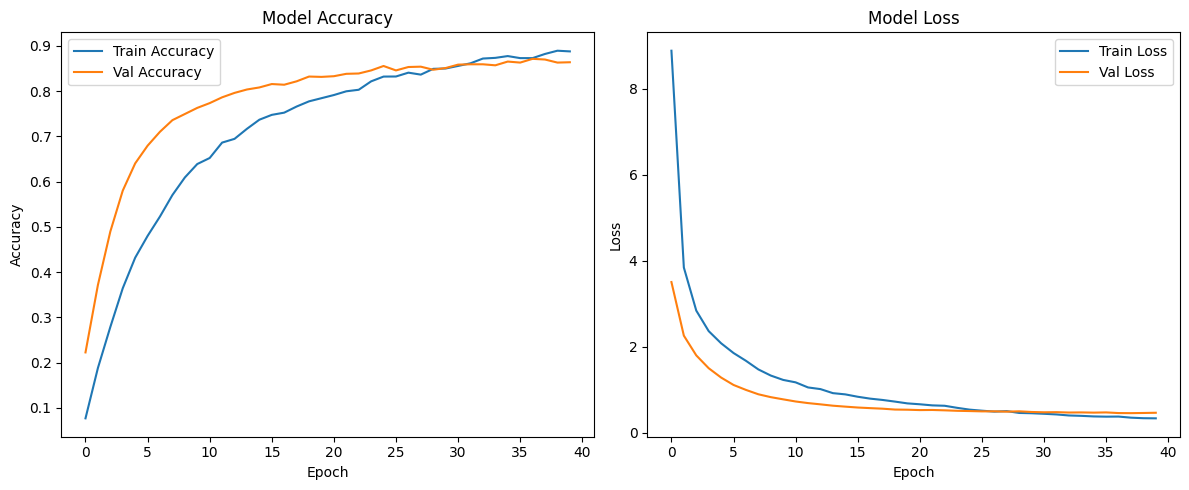

In [10]:
epochs = 40
# lr = 1e-5
optimizer = 'Adam'
name = 'OP1_P3'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [11]:
model_evaluation_precise(model)

Found 736 files belonging to 37 classes.
Start evaluating batches
Batch Number: 3

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Batch Number: 22
Precise test accuracy: 0.87636
Precise test loss: 0.34400


(0.8763587, 0.34400005330858024)